Unscented Kalman filter notebook
===============================



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Indata
======

In [2]:
indata = [line.strip().split("\t") for line in open('data/obj_pose-laser-radar-synthetic-input.txt').readlines()]
print(indata[0])
print(indata[1])

['L', '3.122427e-01', '5.803398e-01', '1477010443000000', '6.000000e-01', '6.000000e-01', '5.199937e+00', '0', '0', '6.911322e-03']
['R', '1.014892e+00', '5.543292e-01', '4.892807e+00', '1477010443050000', '8.599968e-01', '6.000449e-01', '5.199747e+00', '1.796856e-03', '3.455661e-04', '1.382155e-02']


If the data type is 'L' as in laser the information is provided as an [x, y] coordinate. If the data is of type 'R' it's provided as distance, an angle and a radial velocity.



In [5]:
import math
px_l = float(indata[0][1])
py_l = float(indata[0][2])
r_r = float(indata[1][1])
r_fi = float(indata[1][2])
px_r = r_r * math.cos(r_fi)
py_r = r_r * math.sin(r_fi)

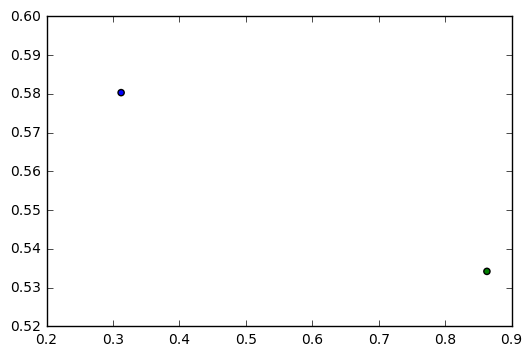

In [6]:
plt.scatter([px_l, px_r],[py_l, py_r], c='bg')

![UKF Filter steps](images/ukf_filter_steps.png)


In [10]:
import math

def radToDegrees(angle):
    return 180*angle/math.pi
fi = math.atan(py_l/px_l)

print("r=" + str(math.sqrt(px_l*px_l+py_l*py_l)))
print("fi=" + str(fi) + "(" + str(radToDegrees(fi)) + ")")



r=0.659006667012808
fi=1.0771862488673942(61.71822580963044)


The second measurement (R = Radar) is


px2=0.8610497672801007
py2=0.5279141012199658


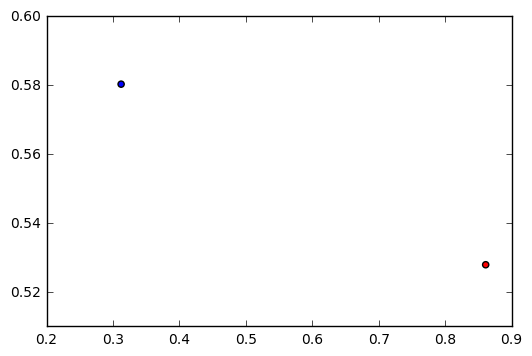

In [12]:
r2 = 1.01
fi2 = 0.55
rp2 = 4.89

px2 = r2 * math.cos(fi2)
py2 = r2 * math.sin(fi2)

print("px2=" + str(px2))
print("py2=" + str(py2))

plt.scatter([px_l,px2],[py_l, py2], c='br')

After the update
----------------


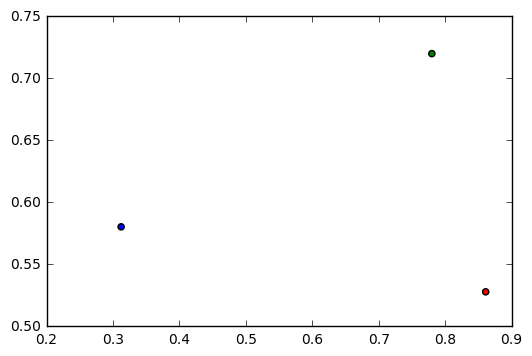

In [14]:

pxu = 0.78
pyu = 0.72
vxu = 6.65
vyu = 1.98
plt.scatter([px_l,px2, pxu],[py_l, py2, pyu], c='brg')

Looking at output data
----------------------


In [56]:
data = [line.strip().split("\t") for line in open('./build/output3.txt').readlines()]

In [57]:
print(data[0])
print(data[1])
print(data[-2])

#for index in range(len(data)):
#    print(index, data[index])
truth_x = [point[10] for point in data[1:-1] ]
truth_y = [point[11] for point in data[1:-1] ]


['time_stamp', 'px_state', 'py_state', 'v_state', 'yaw_angle_state', 'yaw_rate_state', 'sensor_type', 'NIS', 'px_measured', 'py_measured', 'px_ground_truth', 'py_ground_truth', 'vx_ground_truth', 'vy_ground_truth']
['1477010443000000', '0.312243', '0.58034', '0', '0', '0', 'lidar', '2.22449e-314', '0.312243', '0.58034', '0.6', '0.6', '5.19994', '0']
['1477010467900000', '-7.26104', '10.8466', '5.04937', '-0.054466', '-0.119481', 'lidar', '0.675845', '-7.15631', '10.815', '-7.23983', '10.9063', '5.19994', '0.00179692']


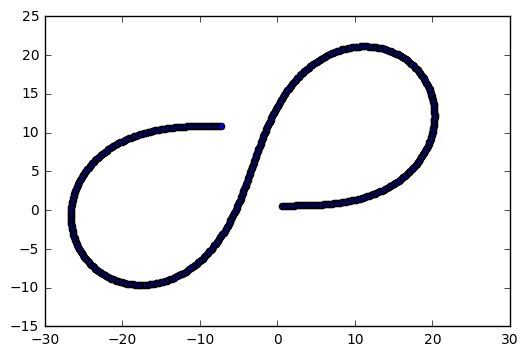

In [58]:
plt.scatter(truth_x, truth_y, c='b')

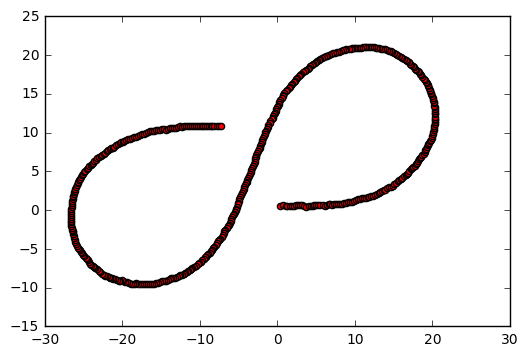

In [59]:
ukf_x = [point[1] for point in data[1:-1]]
ukf_y = [point[2] for point in data[1:-1]]
plt.scatter(ukf_x, ukf_y, c='r')

Compare of UKF data and measurements

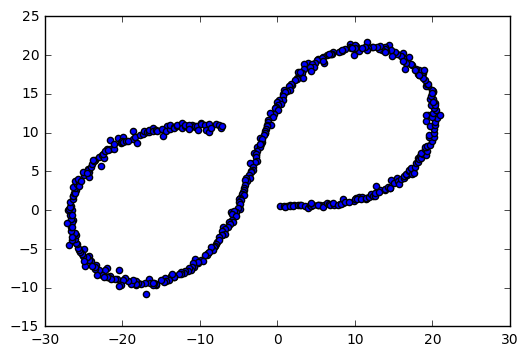

In [60]:
mea_x = [point[8] for point in data[1:-1]]
mea_y = [point[9] for point in data[1:-1]]
plt.scatter(mea_x, mea_y, c='b')

Measurment, UKF data and truth in one plot

[-5, 0, -5, 5]

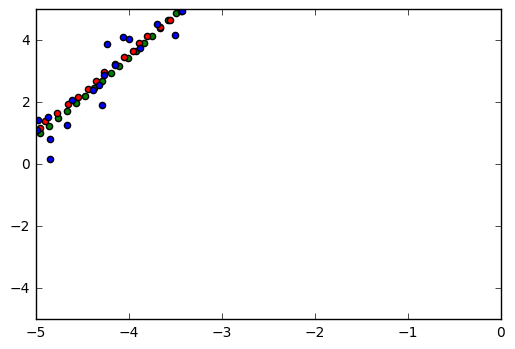

In [63]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(truth_x, truth_y, c='g')
ax1.scatter(ukf_x, ukf_y, c='r')
ax1.scatter(mea_x, mea_y, c='b')
ax1.axis([-5,0,-5,5])


NIS
___

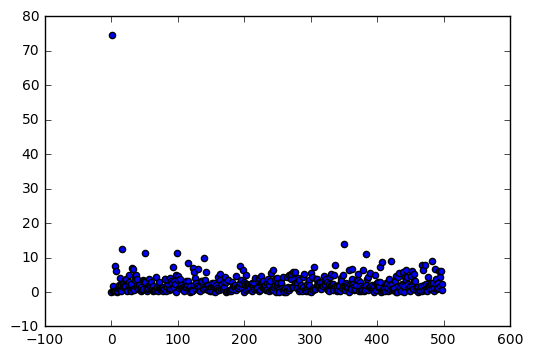

In [64]:
fig_nis = plt.figure()
nis = [point[7] for point in data[1:-1]]
plt.scatter(range(len(nis)), nis)

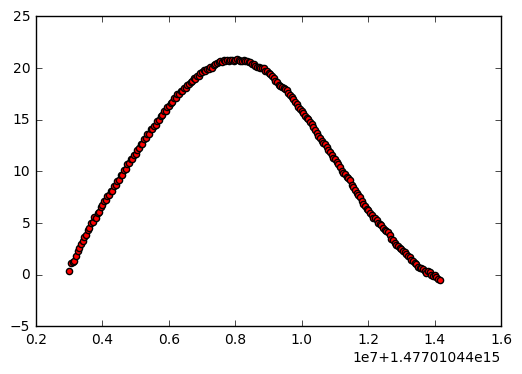

In [26]:
ext_x = [point[0] for point in data[1:225]]
ext_y = [point[1] for point in data[1:225]]
plt.scatter(ext_x, ext_y, c='r')

Something strange happens at datapoint ~220. Most likely this is related some angle arctan related or jacobian calculations.

In [27]:
ext_x = [point[0] for point in data[217:221]]
ext_y = [point[1] for point in data[217:221]]
est_vx = [point[2] for point in data[217:221]]
est_vy = [point[3] for point in data[217:221]]


truth_x = [point[6] for point in data[217:221]]
truth_y = [point[7] for point in data[217:221]]
truth_vx = [point[8] for point in data[217:221]]
truth_vy = [point[9] for point in data[217:221]]




In [28]:
print([ext_x[0], ext_y[0]])
print([truth_x[0], truth_y[0]])
print([ext_x[1], ext_y[1]])
print([truth_x[1], truth_y[1]])
print([ext_x[2], ext_y[2]])
print([truth_x[2], truth_y[2]])
print([ext_x[3], ext_y[3]])
print([truth_x[3], truth_y[3]])

['1477010453800000', '0.330136']
['lidar', '37.6785']
['1477010453850000', '0.220539']
['radar', '18.3655']
['1477010453900000', '-0.0854693']
['lidar', '45.7834']
['1477010453950000', '-0.171224']
['radar', '14.5945']


In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(ext_x, ext_y, c='bbrb')
ax1.scatter(truth_x, truth_y, c='g')

ValueError: could not convert string to float: 'lidar'

ValueError: could not convert string to float: 'lidar'

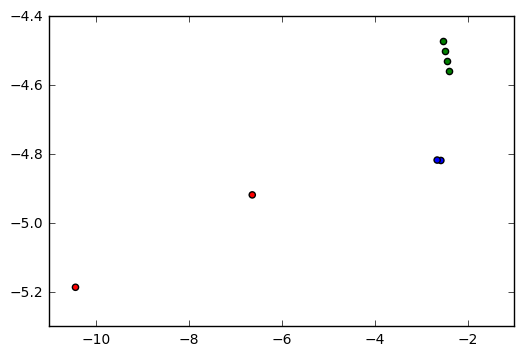

In [63]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(est_vx, est_vy, c='bbrr')
ax1.scatter(truth_vx, truth_vy, c='g')
#ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
#ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
#plt.legend(loc='upper left');
#plt.show()

Lets look at the velocity estimations
--------------------------------------

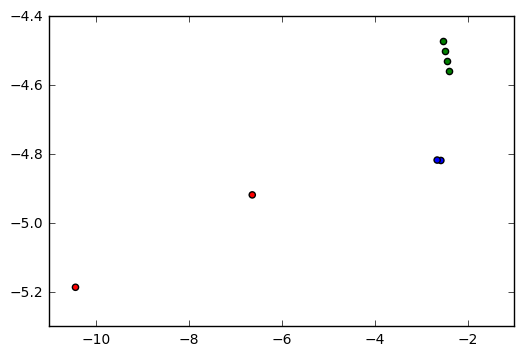

In [58]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(est_vx, est_vy, c='bbrr')
ax1.scatter(truth_vx, truth_vy, c='g')

Changing from atan to atan2
---------------------------

In [98]:
data_atan2 = [line.strip().split("\t") for line in open('outp-170425-atan2.txt').readlines()]

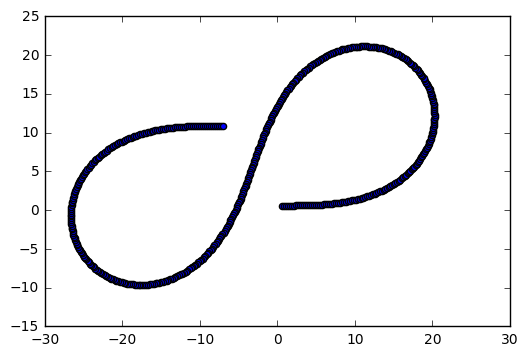

In [99]:
truth_x = [point[6] for point in data_atan2 ]
truth_y = [point[7] for point in data_atan2 ]
plt.scatter(truth_x, truth_y, c='b')

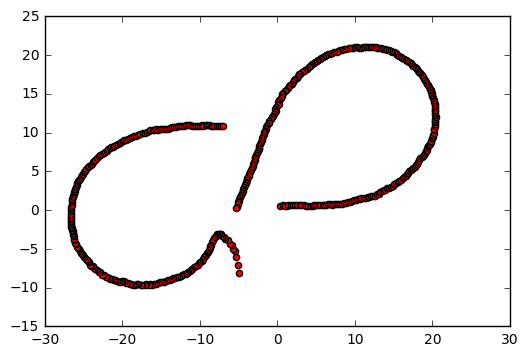

In [100]:

est_x = [point[0] for point in data_atan2]
est_y = [point[1] for point in data_atan2]
plt.scatter(est_x, est_y, c='r')

It seems as if atan2 fixes some but not all problems. Let's take a closer look at when this starts to fail.

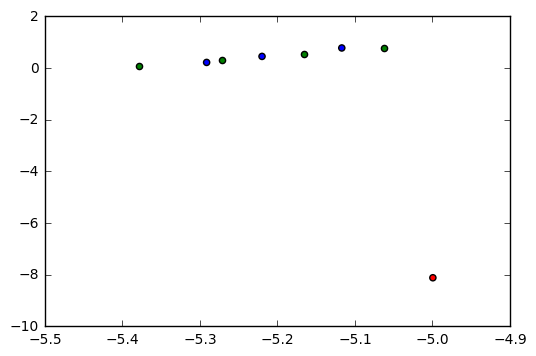

In [101]:
est_x = [point[0] for point in data_atan2[270:274]]
est_y = [point[1] for point in data_atan2[270:274]]
t_x = [point[6] for point in data_atan2[270:274]]
t_y = [point[7] for point in data_atan2[270:274]]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(est_x, est_y, c='bbbr')
ax1.scatter(t_x, t_y, c='g')


#plt.scatter(est_x, est_y, c='r')

After investigation we fins that we have to normalize the the polar coordinates (after calculating y) in the EKF update.

In [107]:
data_atan2_normalize_ekf = [line.strip().split("\t") for line in open('outp.txt').readlines()]

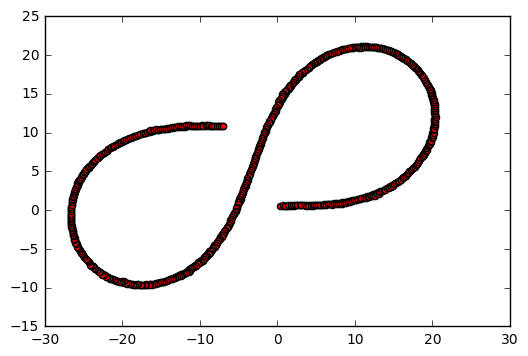

In [111]:
fig = plt.figure()
axis_f = fig.add_subplot(111)

truth_x = [point[6] for point in data_atan2 ]
truth_y = [point[7] for point in data_atan2 ]
axis_f.scatter(truth_x, truth_y, c='b')

est_x = [point[0] for point in data_atan2_normalize_ekf]
est_y = [point[1] for point in data_atan2_normalize_ekf]
axis_f.scatter(est_x, est_y, c='r')

Now the kalman filter and thruth is overlapping. Let's zoom in and take a look around where we used to have problems.


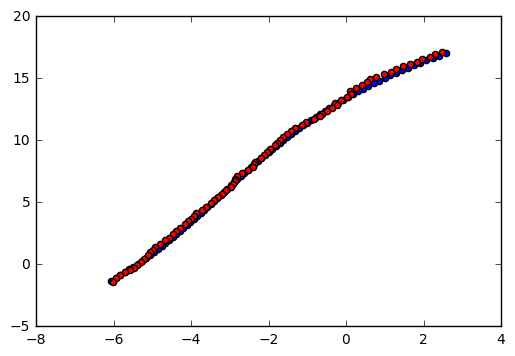

In [112]:
fig = plt.figure()
axis_f = fig.add_subplot(111)

truth_x = [point[6] for point in data_atan2 ]
truth_y = [point[7] for point in data_atan2 ]
axis_f.scatter(truth_x[200:280], truth_y[200:280], c='b')

est_x = [point[0] for point in data_atan2_normalize_ekf]
est_y = [point[1] for point in data_atan2_normalize_ekf]
axis_f.scatter(est_x[200:280], est_y[200:280], c='r')

Looks good! :)